In [1]:
import sys
print(sys.executable)


d:\ML_PROJECT\time_series_analysis\venv\Scripts\python.exe


In [2]:
#libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
plt.style.use("dark_background")
from pandas_datareader.data import DataReader
from datetime import datetime
import yfinance as yf


In [3]:
#available stock names list
url= "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
table =pd.read_html(url)[0] # reads the first table
codes =table["Symbol"].tolist()
names=table["Security"].tolist()
list(zip(codes[:100],names[:100]))

[('MMM', '3M'),
 ('AOS', 'A. O. Smith'),
 ('ABT', 'Abbott Laboratories'),
 ('ABBV', 'AbbVie'),
 ('ACN', 'Accenture'),
 ('ADBE', 'Adobe Inc.'),
 ('AMD', 'Advanced Micro Devices'),
 ('AES', 'AES Corporation'),
 ('AFL', 'Aflac'),
 ('A', 'Agilent Technologies'),
 ('APD', 'Air Products'),
 ('ABNB', 'Airbnb'),
 ('AKAM', 'Akamai Technologies'),
 ('ALB', 'Albemarle Corporation'),
 ('ARE', 'Alexandria Real Estate Equities'),
 ('ALGN', 'Align Technology'),
 ('ALLE', 'Allegion'),
 ('LNT', 'Alliant Energy'),
 ('ALL', 'Allstate'),
 ('GOOGL', 'Alphabet Inc. (Class A)'),
 ('GOOG', 'Alphabet Inc. (Class C)'),
 ('MO', 'Altria'),
 ('AMZN', 'Amazon'),
 ('AMCR', 'Amcor'),
 ('AEE', 'Ameren'),
 ('AEP', 'American Electric Power'),
 ('AXP', 'American Express'),
 ('AIG', 'American International Group'),
 ('AMT', 'American Tower'),
 ('AWK', 'American Water Works'),
 ('AMP', 'Ameriprise Financial'),
 ('AME', 'Ametek'),
 ('AMGN', 'Amgen'),
 ('APH', 'Amphenol'),
 ('ADI', 'Analog Devices'),
 ('ANSS', 'Ansys'),
 ('A

In [4]:
files={
    "AMAZON":"AMZN.csv",
    "GOOGLE":"GOOG.csv",
    "ACCENTURE": "ACN.csv",
    "3M":"MMM.csv"
}
stock_data={}

company_list=list(stock_data.values())
company_name =["AMAZON","GOOGLE","ACCENTURE","3M"]

for company,file in files.items():
    stock_data[company]= pd.read_csv(file)
    stock_data[company]["Company"] = company  # Add company name as column

    print (f"\n Last 5 rows for {company}")
    print(stock_data[company].tail())







"""# the companies we r gonna be analysing
tech_list=['AMZN','GOOG','ACN','MMM']

end= datetime.now()
start=datetime(end.year-1,end.month,end.day)

# storing all the stock data in a dictionary   
stock_data={}
for stock in tech_list:
    stock_data[stock]=yf.download(stock,start,end)

company_list=list(stock_data.values())
company_name =["AMAZON","GOOGLE","ACCENTURE","3M"]

for stock in tech_list:
    stock_data[stock].columns = stock_data[stock].columns.droplevel(1)  # Drops the first level 

for stock, df in stock_data.items():
    print(f"Stock: {stock}")
    print(df.head(), "\n")"""



 Last 5 rows for AMAZON
           Date   Price    Open    High     Low    Vol. Change % Company
246  02/27/2024  173.54  174.07  174.62  172.86  31.14M   -0.68%  AMAZON
247  02/26/2024  174.73  175.70  176.37  174.26  44.37M   -0.15%  AMAZON
248  02/23/2024  174.99  174.28  175.75  173.70  59.72M    0.23%  AMAZON
249  02/22/2024  174.58  173.10  174.80  171.77  55.39M    3.55%  AMAZON
250  02/21/2024  168.59  168.94  170.23  167.14  44.58M    0.90%  AMAZON

 Last 5 rows for GOOGLE
           Date   Price    Open    High     Low    Vol. Change % Company
246  02/27/2024  140.10  139.41  140.49  138.50  22.36M    0.97%  GOOGLE
247  02/26/2024  138.75  143.45  143.84  138.74  33.51M   -4.50%  GOOGLE
248  02/23/2024  145.29  144.97  145.96  144.79  14.52M   -0.02%  GOOGLE
249  02/22/2024  145.32  146.12  146.20  144.01  23.02M    1.03%  GOOGLE
250  02/21/2024  143.84  142.64  143.98  141.91  16.50M    1.15%  GOOGLE

 Last 5 rows for ACCENTURE
           Date   Price    Open    High     Lo

'# the companies we r gonna be analysing\ntech_list=[\'AMZN\',\'GOOG\',\'ACN\',\'MMM\']\n\nend= datetime.now()\nstart=datetime(end.year-1,end.month,end.day)\n\n# storing all the stock data in a dictionary   \nstock_data={}\nfor stock in tech_list:\n    stock_data[stock]=yf.download(stock,start,end)\n\ncompany_list=list(stock_data.values())\ncompany_name =["AMAZON","GOOGLE","ACCENTURE","3M"]\n\nfor stock in tech_list:\n    stock_data[stock].columns = stock_data[stock].columns.droplevel(1)  # Drops the first level \n\nfor stock, df in stock_data.items():\n    print(f"Stock: {stock}")\n    print(df.head(), "\n")'

In [5]:

# Merge all into one DataFrame
df = pd.concat(stock_data.values(), axis=0)
#df.reset_index(inplace=True) 
df.tail(10)

,Date,Price,Open,High,Low,Vol.,Change %,Company
241,03/05/2024,77.50,76.64,78.08,76.56,4.39M,1.37%,3M
242,03/04/2024,76.45,76.17,76.79,75.65,5.58M,-0.46%,3M
243,03/01/2024,76.80,76.95,76.95,75.99,3.40M,-0.28%,3M
244,02/29/2024,77.02,76.92,77.16,76.38,5.16M,0.72%,3M
245,02/28/2024,76.47,76.92,77.45,76.43,2.96M,-0.91%,3M
246,02/27/2024,77.17,76.92,77.21,76.48,2.29M,0.52%,3M
247,02/26/2024,76.77,77.07,77.34,76.45,3.27M,-0.82%,3M
248,02/23/2024,77.40,77.24,77.70,76.84,3.16M,0.38%,3M
249,02/22/2024,77.11,76.55,77.27,76.20,4.19M,0.57%,3M
250,02/21/2024,76.68,76.61,76.89,76.07,3.40M,-0.12%,3M


In [ ]:

# Convert Date to datetime format
df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%Y")

# Convert 'Change %' (ensure all values are strings before removing %)
df["Change %"] = df["Change %"].astype(str).str.replace('%',' ',regex=True).astype(float)


# Convert 'Vol.' column  for handling M and K
def changes(vol):
    if isinstance(vol,str):
        if vol[-1] == "M":
            return float(vol[:-1])*1000000
        elif vol[-1] =="K":
            return float(vol[:-1])*1000
        else:
            return float(vol)
    return vol

df["Vol."] = df["Vol."].apply(convert_volume)
#changing "Vol." to "Volume"
df.rename(columns={"Vol.": "Volume"}, inplace=True)


# Rename 'Price' column to 'Close' for consistency
df.rename(columns={"Price": "Close"}, inplace=True)

# Print summary to verify cleaning
print(df.dtypes)  # Check data types
print(df.tail(10))  # Check cleaned data



Date        datetime64[ns]
Close              float64
Open               float64
High               float64
Low                float64
volume             float64
Change %           float64
Company             object
change %           float64
Change             float64
change              object
dtype: object
          Date  Close   Open   High    Low     volume  Change % Company  \
241 2024-03-05  77.50  76.64  78.08  76.56  4390000.0      1.37      3M   
242 2024-03-04  76.45  76.17  76.79  75.65  5580000.0     -0.46      3M   
243 2024-03-01  76.80  76.95  76.95  75.99  3400000.0     -0.28      3M   
244 2024-02-29  77.02  76.92  77.16  76.38  5160000.0      0.72      3M   
245 2024-02-28  76.47  76.92  77.45  76.43  2960000.0     -0.91      3M   
246 2024-02-27  77.17  76.92  77.21  76.48  2290000.0      0.52      3M   
247 2024-02-26  76.77  77.07  77.34  76.45  3270000.0     -0.82      3M   
248 2024-02-23  77.40  77.24  77.70  76.84  3160000.0      0.38      3M   
249 2024-02-22

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1004 entries, 0 to 250
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1004 non-null   datetime64[ns]
 1   Close     1004 non-null   float64       
 2   Open      1004 non-null   float64       
 3   High      1004 non-null   float64       
 4   Low       1004 non-null   float64       
 5   Vol.      1004 non-null   float64       
 6   Change %  1004 non-null   float64       
 7   Company   1004 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 70.6+ KB


In [8]:
df.describe()

,Date,Close,Open,High,Low,Vol.,Change %
count,1004,1004.000000,1004.000000,1004.000000,1004.000000,1.004000e+03,1004.000000
mean,2024-08-19 17:35:37.051792896,205.943008,205.886076,207.925359,203.901076,1.632281e+07,0.143157
min,2024-02-21 00:00:00,76.450000,76.170000,76.790000,75.650000,8.032200e+05,-9.310000
25%,2024-05-20 00:00:00,148.695000,148.152500,149.750000,147.627500,2.990000e+06,-0.762500
50%,2024-08-20 00:00:00,180.720000,181.145000,182.745000,179.320000,1.137500e+07,0.155000
75%,2024-11-18 00:00:00,251.985000,249.610000,253.237500,248.195000,2.726250e+07,0.992500
max,2025-02-20 00:00:00,398.250000,395.200000,398.350000,390.420000,1.414500e+08,22.990000
std,NaN,85.761017,85.800725,86.536655,85.058093,1.718246e+07,1.771911


In [9]:
df.isnull().sum()

Date        0
Close       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
Company     0
dtype: int64

In [10]:
#lets plot visualizations on closing prices
tech_list=['AMZN','GOOG','ACN','MMM']

plt.figure(figsize=(15,6))
plt.subplots_adjust(top=1.25,bottom=1.2)
for i,(company,name) in enumerate(zip(company_list,company_name),1):
    plt.subplot(2,2,i)
    company['Close'].plot()
    plt.ylabel('Close Price')
    plt.xlabel(None)
    plt.title(f"closing price of {name}")
plt.tight_layout()
plt.show()


<Figure size 1500x600 with 0 Axes>

In [11]:
#visualizations on volume of sales
plt.figure(figsize=(15,6))
plt.subplots_adjust(top=1.25,bottom=1.2)
for i, (company, name) in enumerate(zip(company_list, company_name), 1):
    plt.subplot(2,2,i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume of {name}")
plt.tight_layout()
plt.show()

<Figure size 1500x600 with 0 Axes>

In [12]:
#calculating moving average

#moving average: shows the average of a set of data points over a specific period of time
#concept: If the moving average is rising, the trend is bullish. If it’s falling, the trend is bearish.
#simple moving average: calculates the average of a set of data points over a specific period of time
ma_days=[10,20,30] #moving average periods of 10,20,30 days
for ma in ma_days:
    for company in company_list:
        col_name=f"MA for {ma} days"
        company[col_name] =company ['Close'].rolling(window=ma,min_periods =1).mean()
        
for company,name in zip(company_list,company_name):
    print(f"\nMoving Averages for {name}: \n")
    print(company[['Close','MA for 10 days','MA for 20 days','MA for 30 days']].tail(10))


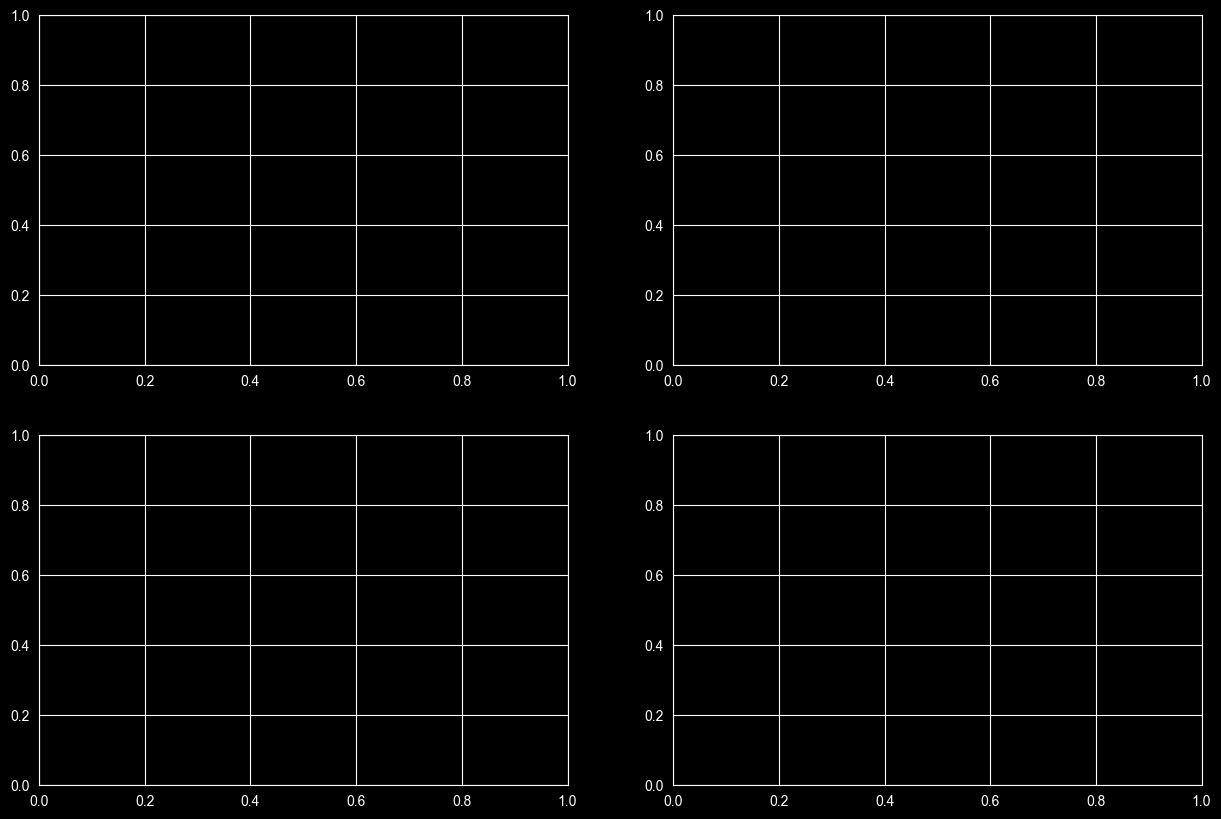

In [13]:
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(15,10))
for ax,company,name in zip(axes.flat,company_list,company_name):
    company[['Close','MA for 10 days','MA for 20 days','MA for 3o days']]
    ax.set_title(name)
    plt.tight_layout()
    plt.show()